In [121]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [122]:
df = pd.read_parquet('../data/comet/ancestral_100_1000_validation_predictive_0_smoke_test.parquet')

In [123]:
example


source                          Ich freue mich, Ihre Stimme zu hören.
target                                 I am happy to hear your voice.
hypotheses          [I'm glad to hear your voice., I am glad to he...
references_count    [130, 188, 174, 88, 16, 149, 153, 14, 1, 1, 9,...
utilities           [[0.9887076, 0.9338673, 1.0947727, 0.958106, 0...
Name: 16, dtype: object

In [124]:
np.random.seed(5)
random_samples = np.random.choice(100, 4)

In [125]:
random_samples

array([99, 78, 61, 16])

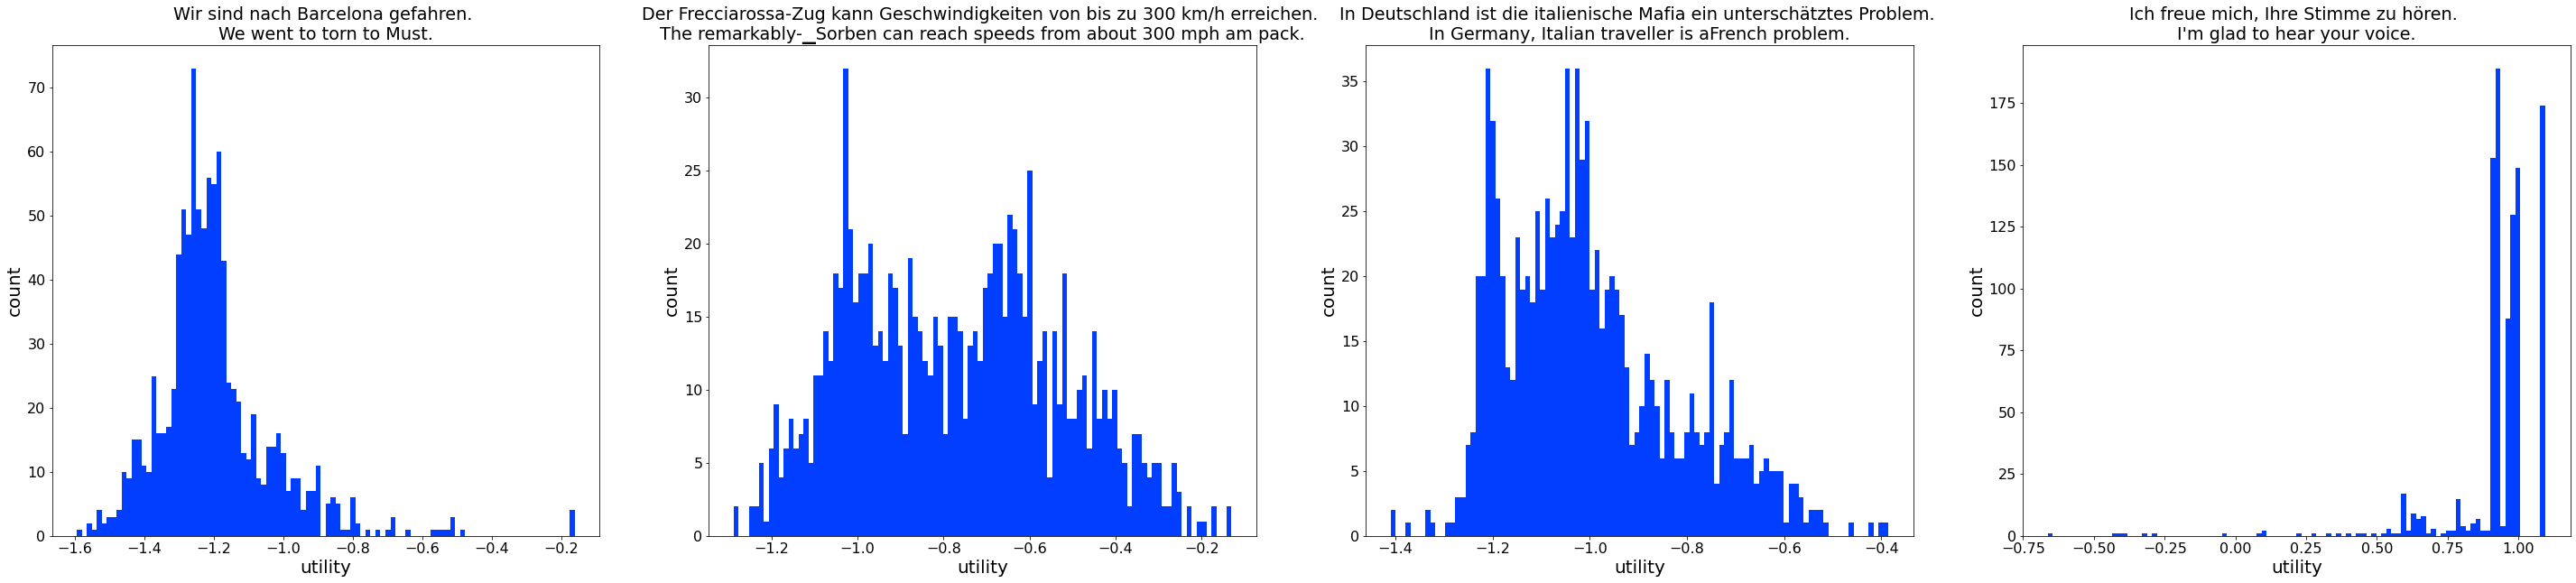

In [126]:
import itertools
fig, (axs) = plt.subplots(1, 4, figsize=(50,10),)
color_palette = itertools.cycle(sns.color_palette('bright'))
plt.rcParams.update({'font.size': 16})

color = next(color_palette)
for i, sample in enumerate(random_samples):
    ax = axs[i]
    example = df.iloc[sample]
    utilities = example["utilities"][0]
    counts = example["references_count"]
    x = []
    for util, count in zip(utilities, counts):
        x += [util] * count
    ax.hist(x, bins=100, color=color)
    ax.set_xlabel('utility',  size=20)
    ax.set_ylabel('count' ,  size=20)
    ax.set_title("{} \n{}".format(example["source"], example["hypotheses"][0]))
plt.show()

In [127]:
from scipy.stats import t

In [153]:
x = np.arange(-5, 5, 0.1)

In [154]:
x

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [169]:
y = t.pdf(x, 0.0001, 0, 1)

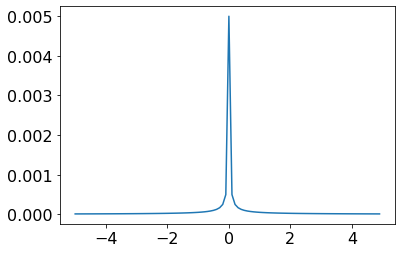

In [170]:
plt.plot(x, y)